## Glimpse into learning curves
Figure 5 in the paper.

In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# from load_modules import *
import os
import sys
sys.path.append('../src')
from post_process import *

%matplotlib inline
fpath = Path(os.getcwd())
print('Current path:', fpath)

In [2]:
# Settings
dpi = 300

## Path to data

In [3]:
fname = 'all_scores.csv'

In [4]:
dpath = fpath/'../lc.raw'
## gdsc1_path = Path(dpath, 'lc.gdsc1.dGBDT', fname)
# dataset = 'gdsc1'
# dataset = 'gdsc2'
dataset = 'ctrp'
# dataset = 'nci60'
dpath = Path(dpath, f'lc.{dataset}.dGBDT', fname)

In [5]:
outpath = fpath/'../lc.fits/glimpse'
os.makedirs(outpath, exist_ok=True)

## Load data

In [6]:
model = 'dGBDT'
## gdsc1 = load_data(gdsc1_path, tr_set='te');
data = load_data(dpath, tr_set='te');
# print_count(aa=gdsc1)

## Raw plots

In [7]:
# Global plotting params
# -------------------------------
legend_fontsize = 12
met = 'mean_absolute_error';  # startParams = {'a': 1.2, 'b': -0.4, 'c': 0.04}

t_set = 'te'
xtick_scale = 'log2'
ytick_scale = 'log2'
# xtick_scale = 'linear'
# ytick_scale = 'linear'

kwargs = {'metric_name': met,
          'tr_set': t_set,
          'xtick_scale': xtick_scale,
          'ytick_scale': ytick_scale,
          'plot_median': True,
          'plot_shadow': False}

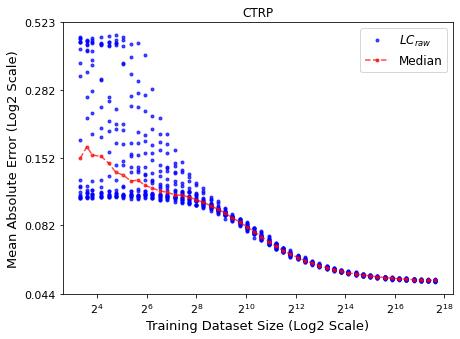

In [8]:
# Plot dGBDT (GDSC1)
# -------------------------------
## kwargs.update({'title': f'GDSC1'})
kwargs.update({'title': f'{dataset.upper()}'})
## ax = lc_plots.plot_lc_single_metric(gdsc1, **kwargs);
ax = lc_plots.plot_lc_single_metric(data, **kwargs);
ax.legend(frameon=True, fontsize=legend_fontsize, loc='best')
ax.grid(False)

plt.savefig(outpath/f'lc_raw_{model}_{dataset}.png', dpi=dpi)

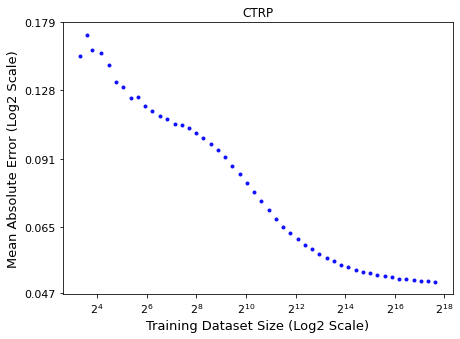

In [9]:
ax = None
## data=gdsc1
## name='GDSC1'
dfit_all = fit_data(data, x_fit_mn=0, x_fit_mx=None, method='binomial')
x_all = dfit_all['tr_size'].values
y_all = dfit_all['y'].values
color = 'b'

pnts_args_all = {'metric_name': met,
                 'xtick_scale': 'log2',
                 'ytick_scale': 'log2',
                 'alpha': 0.9,
                 'ls': '', 'marker': '.'}

ax = lc_plots.plot_lc(x=x_all, y=y_all, ax=ax, **pnts_args_all, color=color)

## ax.set_title(f'{name}')
ax.set_title(f'{dataset.upper()}')
ax.grid(False)

plt.savefig(outpath/f'median_{model}_{dataset}_loglog.png', dpi=dpi)

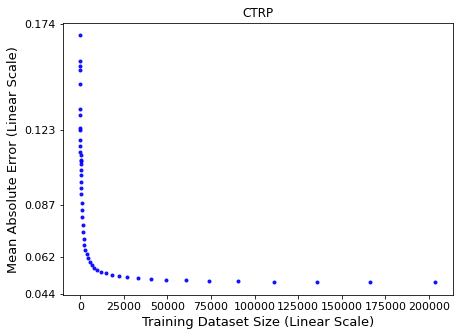

In [10]:
ax = None
## data=gdsc1
## name='GDSC1'
dfit_all = fit_data(data, x_fit_mn=0, x_fit_mx=None, method='binomial')
x_all = dfit_all['tr_size'].values
y_all = dfit_all['y'].values
color = 'b'

pnts_args_all = {'metric_name': met,
                 'xtick_scale': 'linear',
                 'ytick_scale': 'linear',
                 'alpha': 0.9,
                 'ls': '', 'marker': '.'}

ax = lc_plots.plot_lc(x=x_all, y=y_all, ax=ax, **pnts_args_all, color=color)

## ax.set_title(f'{name}')
ax.set_title(f'{dataset.upper()}')
# ax.legend(frameon=True, fontsize=10, loc='best')
ax.grid(False)

plt.savefig(outpath/f'median_{model}_{dataset}_linlin.png', dpi=dpi)